In [1]:
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

In [2]:
syr=1979
eyr=1980
nyr=eyr-syr+1
nmpyr=12
monthNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

varname='t2m' # 2m temperature
inPath='/shared/land/ERA5/monthly/'

In [3]:
# Read first file to get dimensions
inFile='%sea_moda_fc_%s.nc4' %(inPath,syr)
ncfile=Dataset(inFile,'r')
lats = ncfile.variables['latitude'][:]
ny=lats.size
lons = ncfile.variables['longitude'][:]
nx=lons.size
nctime = ncfile.variables['time'][:]
nt=nctime.size
ncfile.close()

print(lons.shape)
print(lats.shape)

(1280,)
(525,)


In [4]:
# Create a numpy array of all zeros
# Note in Python array dimensions are reversed from other languages
data=np.zeros((nyr,nt,ny,nx))

# Note the range function is syr up to, but not included eyr
for iyr in range(syr,eyr+1):
    inFile='%sea_moda_fc_%s.nc4' %(inPath,iyr)
    ncfile=Dataset(inFile,'r')
    units=ncfile.variables[varname].units
    print(units)
#    print(ncfile.variables)[varname]
    data[iyr-syr,:,:,:]=ncfile.variables[varname][:,:,:]
    ncfile.close()

K
K


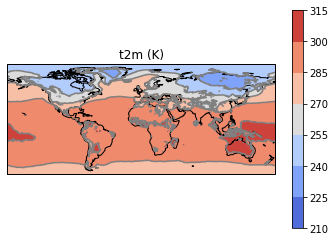

In [5]:
# Plot first year and first time to check data
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(210,320,15)
contour=ax.contourf(lons, lats, data[0,0,:,:],levels=clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
plt.colorbar(contour)
plt.title(varname+' ('+units+')')
contourlines=ax.contour(lons,lats,data[0,0,:,:],levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
ax.coastlines()
plt.show()

In [6]:
climo=np.mean(data,axis=0)
print(np.min(climo), np.max(climo))

227.81122589111328 312.90869140625


1
2
3
4
5
6
7
8
9
10
11
12


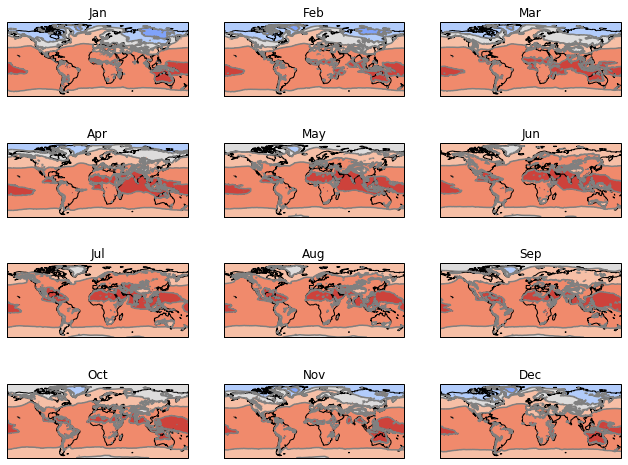

In [7]:
fig=plt.figure(figsize=(11,8.5))
for imn in range(1,nmpyr+1):
    print(imn)
    ax=plt.subplot(4,3,imn,projection=ccrs.PlateCarree())
    contour=ax.contourf(lons, lats, climo[imn-1,:,:], levels = clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
    contourlines=ax.contour(lons,lats,climo[imn-1,:,:],levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
    plt.title(monthNames[imn-1])
    ax.coastlines()
plt.show()